In [2]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from keras.regularizers import L1,L2
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: arabic_dataset_classifiction.csv/arabic_dataset_classifiction.csv  


In [3]:
df=pd.read_csv('/content/arabic_dataset_classifiction.csv/arabic_dataset_classifiction.csv')

In [4]:
df.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111728 entries, 0 to 111727
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    108789 non-null  object
 1   targe   111728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
df=df.dropna()

In [7]:
X = df['text']
y = df['targe']

In [23]:
dict1={0:'Culture',1:"diverse",2:'Economy',3:"Politic",4:'Sport'}

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Tokenize the input text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [11]:
X_train[0]

[79378,
 165817,
 2356,
 1,
 1778,
 182,
 46511,
 3,
 158,
 1124,
 11035,
 215592,
 897,
 1719,
 553,
 170,
 954,
 713,
 286,
 238,
 31,
 1,
 3841,
 4868,
 22197,
 23706,
 10997,
 1,
 185,
 723,
 2982,
 26201,
 12926,
 3292,
 6861,
 32,
 897,
 1134,
 8737,
 182,
 1374,
 3600,
 930,
 5613,
 2896,
 10030,
 9177,
 1113,
 19619,
 8303,
 22198,
 4341,
 1700,
 2031,
 1863,
 609,
 74,
 2546,
 15285,
 3600,
 930,
 20129,
 2356,
 8105,
 22545,
 2299,
 47,
 3462,
 5170,
 124,
 1033,
 3,
 1214,
 473,
 4,
 2007,
 745,
 1,
 1035,
 22747,
 738,
 12209,
 2039,
 23893,
 8650,
 2344,
 18,
 512,
 851,
 20578,
 1374,
 3033,
 101776,
 3351,
 6887,
 48602,
 5,
 10439,
 7980,
 10838,
 9177,
 13478,
 3327,
 74,
 468,
 7953,
 11677,
 4326,
 1449,
 4153,
 13351,
 3868,
 8421,
 20,
 1,
 185,
 305,
 1234,
 3708,
 32,
 207,
 64,
 6801,
 6767,
 12116,
 2299,
 3,
 586,
 8458,
 20728,
 2158,
 2705,
 5,
 213,
 231,
 468,
 30805,
 11,
 139968,
 2,
 7954,
 17547,
 5,
 1778,
 182,
 1374,
 820,
 28730,
 2,
 13352,
 3842,

In [12]:
del X,y

In [13]:
# Pad the input sequences to have the same length
max_sequence_length = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='post')

In [14]:
X_train[0]

array([ 79378, 165817,   2356, ...,      0,      0,      0], dtype=int32)

In [15]:
len(label_encoder.classes_)

5

In [16]:
#Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=256, input_length=max_sequence_length))
model.add(layers.Bidirectional(layers.LSTM(16, dropout=0.6)))
model.add(Dense(32))
model.add(Dropout(0.6))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [17]:
# Compile the model
adam = Adam(learning_rate=0.001)
#rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer= adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=5,batch_size=256)

Epoch 1/5
319/319 [==============================] - 213s 649ms/step - loss: 0.5979 - accuracy: 0.7818 - val_loss: 0.2304 - val_accuracy: 0.9389
Epoch 2/5
319/319 [==============================] - 205s 643ms/step - loss: 0.1728 - accuracy: 0.9592 - val_loss: 0.1854 - val_accuracy: 0.9510
Epoch 3/5
319/319 [==============================] - 205s 642ms/step - loss: 0.0927 - accuracy: 0.9796 - val_loss: 0.1869 - val_accuracy: 0.9522
Epoch 4/5
319/319 [==============================] - 210s 658ms/step - loss: 0.0533 - accuracy: 0.9890 - val_loss: 0.2181 - val_accuracy: 0.9523
Epoch 5/5
319/319 [==============================] - 205s 642ms/step - loss: 0.0446 - accuracy: 0.9899 - val_loss: 0.2429 - val_accuracy: 0.9504


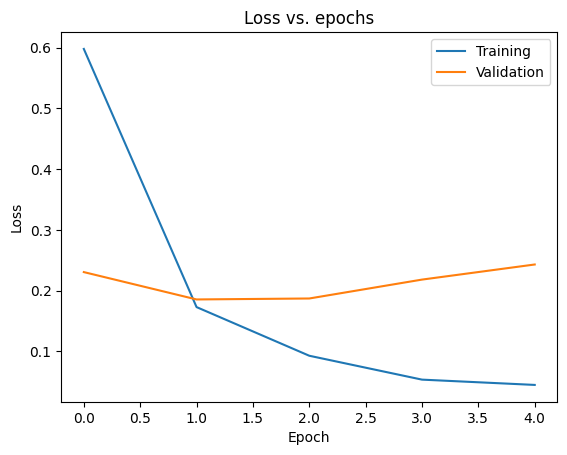

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

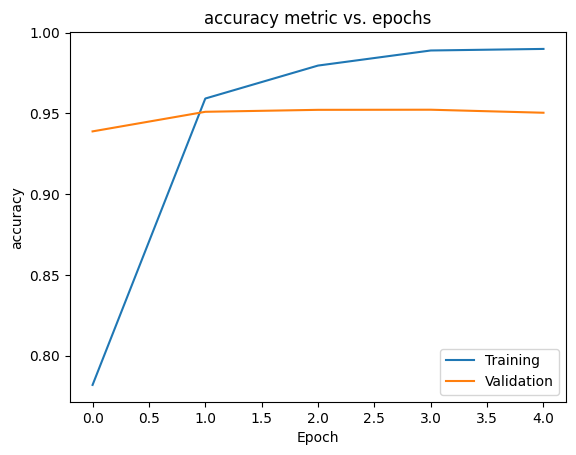

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy metric vs. epochs')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

850/850 [==============================] - 99s 116ms/step - loss: 0.2429 - accuracy: 0.9504
Test Loss: 0.24292819201946259
Test Accuracy: 0.9504007697105408


In [24]:
# Input for prediction
input_sentence = "اللاعب تأخر في العودة"
# Tokenize the input sentence
input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length, padding='post')

# Make prediction using the model
y_pred = model.predict(input_sequence)

# Convert the predicted probability to class label
y_pred_class = y_pred.argmax(axis=1)[0]

# Convert the predicted class to actual value
y_pred_name = label_encoder.inverse_transform([y_pred_class])[0]

# Print the predicted class
print("Predicted class:", dict1[y_pred_name])

1/1 [==============================] - 0s 116ms/step
Predicted class: Sport


In [25]:
# Input for prediction
input_sentence =  "قامت الشرطة القبض على اللصوص"
# Tokenize the input sentence
input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length, padding='post')

# Make prediction using the trained model
y_pred = model.predict(input_sequence)

# Convert the predicted probability to class label
y_pred_class = y_pred.argmax(axis=1)[0]

# Convert the predicted class to actual value
y_pred_name = label_encoder.inverse_transform([y_pred_class])[0]

# Print the predicted class
print("Predicted class:", dict1[y_pred_name])

1/1 [==============================] - 0s 113ms/step
Predicted class: diverse


In [26]:
# Input for prediction
input_sentence =  "قامت الدولة بعمل إصلاحات قضائية و دستورية"
# Tokenize the input sentence
input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length, padding='post')

# Make prediction using the trained model
y_pred = model.predict(input_sequence)

# Convert the predicted probability to class label
y_pred_class = y_pred.argmax(axis=1)[0]

# Convert the predicted class to actual value
y_pred_name = label_encoder.inverse_transform([y_pred_class])[0]

# Print the predicted class
print("Predicted class:", dict1[y_pred_name])

1/1 [==============================] - 0s 196ms/step
Predicted class: Politic


In [27]:
# Input for prediction
input_sentence =  "مع نهاية الموسم الحالي ستنتج مصر ألف طن من الحبوب"
# Tokenize the input sentence
input_sequence = tokenizer.texts_to_sequences([input_sentence])
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length, padding='post')

# Make prediction using the trained model
y_pred = model.predict(input_sequence)

# Convert the predicted probability to class label
y_pred_class = y_pred.argmax(axis=1)[0]

# Convert the predicted class label back to CPT Name using the label encoder
y_pred_name = label_encoder.inverse_transform([y_pred_class])[0]

# Print the predicted class
print("Predicted class:", dict1[y_pred_name])

1/1 [==============================] - 0s 115ms/step
Predicted class: Economy
